In [1610]:
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1611]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, KFold, LeaveOneOut
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, RidgeCV
import seaborn as sns
import copy
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [1612]:
import pydotplus

In [1613]:
import graphviz

In [1614]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from sklearn import tree

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

In [1615]:
df = pd.read_csv('/Users/angeloimperiale/Downloads/Churn-Billing.csv') 
df

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [1616]:
df2 =pd.read_csv('/Users/angeloimperiale/Downloads/Churn-CustomerMasterData.csv')
df2

,customerID,gender,SeniorCitizen,Partner,Dependents
0,3999-WRNGR,Female,0,Yes,Yes
1,1965-DDBWU,Male,0,No,No
2,6734-CKRSM,Female,0,No,No
3,1761-AEZZR,Male,0,No,No
4,4138-NAXED,Male,0,No,No
...,...,...,...,...,...
7038,6077-BDPXA,Female,0,No,No
7039,0327-WFZSY,Male,0,Yes,Yes
7040,0743-HNPFG,Female,0,Yes,Yes
7041,3873-WOSBC,Male,0,Yes,No


In [1617]:
df3 = pd.merge(df,df2) # Merge i due dataframe
df3

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,No phone service,DSL,No,Yes,No,No,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,No,DSL,Yes,No,Yes,No,No,...,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No
2,3668-QPYBK,2,Yes,No,DSL,Yes,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,...,One year,Yes,Mailed check,84.80,1990.50,No,Male,0,Yes,Yes
7039,2234-XADUH,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,0,Yes,Yes
7040,4801-JZAZL,11,No,No phone service,DSL,Yes,No,No,No,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes
7041,8361-LTMKD,4,Yes,Yes,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,Male,1,Yes,No


In [1618]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [1619]:
#df.PaymentMethod = pd.get_dummies(df.PaymentMethod, columns=['PaymentMethod'])
df.sort_values(by=['TotalCharges'], ascending = 0, inplace = True)
#df = df[df['TotalCharges'].notna()]
df.columns[df.isna().any().any()] 

array([['customerID', 'tenure', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']],
      dtype=object)

In [1620]:
#Capire quanti valori nulli
print('Number of null values: {0:d}'.format(sum(pd.isnull(df['TotalCharges']))))
print('Ratio of null values: {0:5.3f}'.format(sum(pd.isnull(df['TotalCharges']))/df.shape[0]))

Number of null values: 11
Ratio of null values: 0.002


In [1621]:
df3['TotalCharges'] = df3['TotalCharges'].fillna(df3['TotalCharges'].median(skipna=True)) #Eliminare i valori NaN

In [1622]:
df3['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [1623]:
print('Number of null values: {0:d}'.format(sum(pd.isnull(df['TotalCharges']))))
print('Ratio of null values: {0:5.3f}'.format(sum(pd.isnull(df['TotalCharges']))/df.shape[0]))

Number of null values: 11
Ratio of null values: 0.002


In [1624]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [1625]:
df3.isna().sum() #Check dei valori NaN

customerID          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64

In [1626]:
df3.corr() # Correlazione fra le features

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
tenure,1.000000,0.247900,0.825464,0.016567
MonthlyCharges,0.247900,1.000000,0.650864,0.220173
TotalCharges,0.825464,0.650864,1.000000,0.102652
SeniorCitizen,0.016567,0.220173,0.102652,1.000000


<AxesSubplot:>

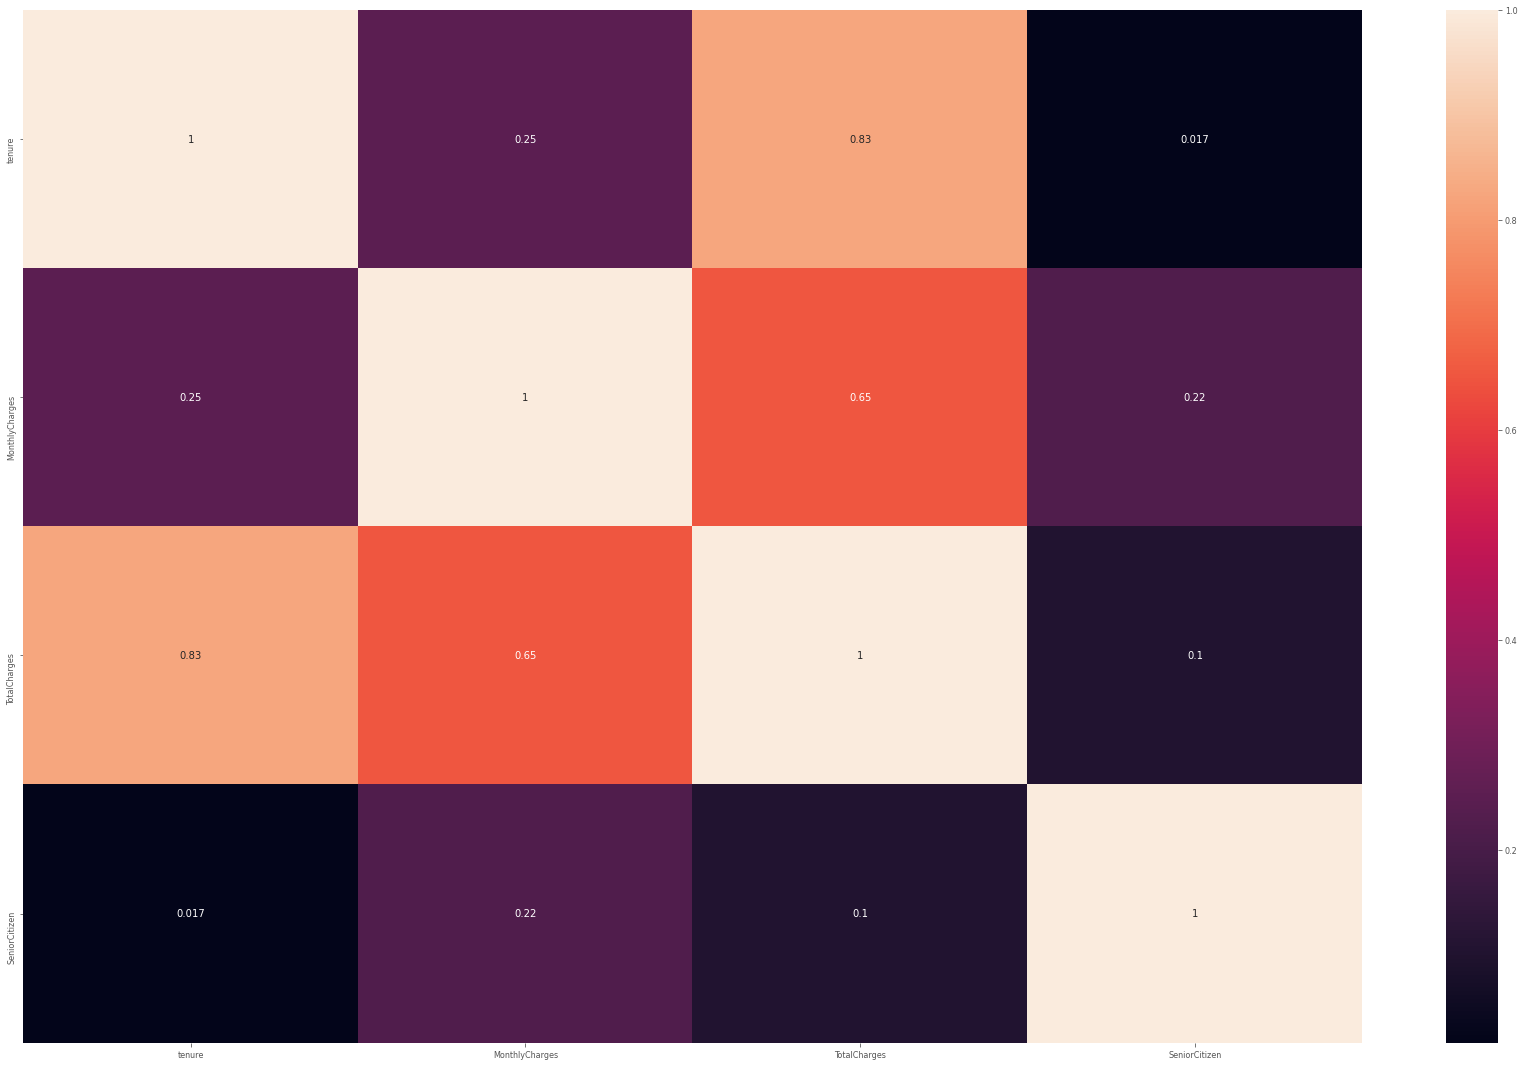

In [1627]:
plt.figure(figsize = (30,19))
sns.heatmap(df3.corr(), annot=True) 


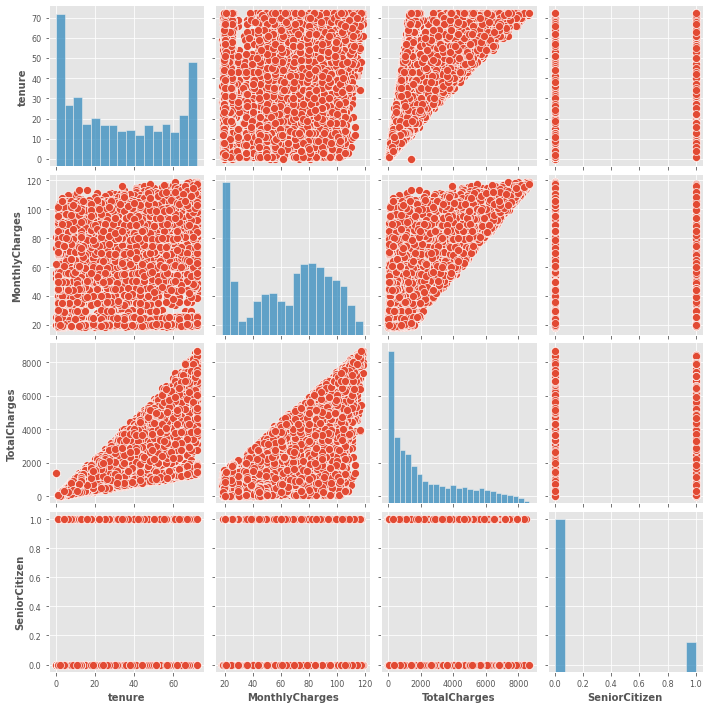

In [1628]:
sns.pairplot(df3)
plt.show()

In [1629]:
# Selezione di un dataframe per care Linear Regression
df4 = df3[['TotalCharges', 'MonthlyCharges', 'Churn']] 
df4

,TotalCharges,MonthlyCharges,Churn
0,29.85,29.85,No
1,1889.50,56.95,No
2,108.15,53.85,Yes
3,1840.75,42.30,No
4,151.65,70.70,Yes
...,...,...,...
7038,1990.50,84.80,No
7039,7362.90,103.20,No
7040,346.45,29.60,No
7041,306.60,74.40,Yes


In [1630]:
df4['Churn'] = pd.get_dummies(df3['Churn']) # Trasformazione della variabile

In [1631]:
X = df4[['MonthlyCharges']].values # con l'attributo values ottieniamo l'array
Y = df4["Churn"].values

In [1632]:
X

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [1633]:
Y

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [1634]:
#Modello di regressione Lineare dove si utilizza MonthlyCharges come unica feature
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [1635]:
from sklearn.linear_model import LinearRegression

ll = LinearRegression()
ll.fit(X_train, Y_train) # passiamo i set di addestramento 
Y_pred_train = ll.predict(X_train) # eseguiamo la predizione sul train set
Y_pred_test = ll.predict(X_test) # eseguiamo la predizione anche sul test set

In [1636]:
from sklearn.metrics import mean_squared_error

print("MSE train: %f" % mean_squared_error(Y_train, Y_pred_train))
print("MSE test: %f" % mean_squared_error(Y_test, Y_pred_test))

MSE train: 0.188385
MSE test: 0.185974


In [1637]:
from sklearn.metrics import r2_score

print("R2 train: %f" % r2_score(Y_train, Y_pred_train))
print("R2 test: %f" % r2_score(Y_test, Y_pred_test))

R2 train: 0.037287
R2 test: 0.037496


In [1638]:
#R2 < 0,3 Il modello Linear Regression è inutile

In [1639]:
# Modello RANDOM FOREST 

In [1640]:
df3.dtypes # Studio del dataframe

customerID           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
dtype: object

In [1641]:
# individiazione dei valori per ogni features

In [1642]:
df3['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [1643]:
df3['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [1644]:
df3['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [1645]:
df3['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [1646]:
df3['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [1647]:
df3['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [1648]:
df3['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [1649]:
df3['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [1650]:
df3['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [1651]:
df3['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [1652]:
df3['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [1653]:
df3['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [1654]:
df3['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [1655]:
df3['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [1656]:
df3['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [1657]:
df3['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [1658]:
# Trasformazioni in int con LabelEncoder

In [1659]:
le = LabelEncoder()
le.fit(['Yes', 'No'])
le.transform(df3['PhoneService'])
df3['PhoneService'] = le.transform(df3['PhoneService']).astype(int)

le1 = LabelEncoder()
le1.fit(['No', 'Yes', 'No phone service'])
le1.transform(df3['MultipleLines'])
df3['MultipleLines'] = le1.transform(df3['MultipleLines']).astype(int)

le2 = LabelEncoder()
le2.fit(['Fiber optic', 'DSL', 'No'])
le2.transform(df3['InternetService'])
df3['InternetService'] = le2.transform(df3['InternetService']).astype(int)

le3 = LabelEncoder()
le3.fit(['No', 'Yes', 'No internet service'])
le3.transform(df3['OnlineSecurity'])
df3['OnlineSecurity'] = le3.transform(df3['OnlineSecurity']).astype(int)

le4 = LabelEncoder()
le4.fit(['No', 'Yes', 'No internet service'])
le4.transform(df3['OnlineBackup'])
df3['OnlineBackup'] = le4.transform(df3['OnlineBackup']).astype(int)

le5 = LabelEncoder()
le5.fit(['No', 'Yes', 'No internet service'])
le5.transform(df3['DeviceProtection'])
df3['DeviceProtection'] = le5.transform(df3['DeviceProtection']).astype(int)

le6 = LabelEncoder()
le6.fit(['No', 'Yes', 'No internet service'])
le6.transform(df3['TechSupport'])
df3['TechSupport'] = le6.transform(df3['TechSupport']).astype(int)

le7 = LabelEncoder()
le7.fit(['No', 'Yes', 'No internet service'])
le7.transform(df3['StreamingTV'])
df3['StreamingTV'] = le7.transform(df3['StreamingTV']).astype(int)

le8 = LabelEncoder()
le8.fit(['No', 'Yes', 'No internet service'])
le8.transform(df3['StreamingMovies'])
df3['StreamingMovies'] = le8.transform(df3['StreamingMovies']).astype(int)

le9 = LabelEncoder()
le9.fit(['Month-to-month', 'Two year', 'One year'])
le9.transform(df3['Contract'])
df3['Contract'] = le9.transform(df3['Contract']).astype(int)

le10 = LabelEncoder()
le10.fit(['No', 'Yes'])
le10.transform(df3['PaperlessBilling'])
df3['PaperlessBilling'] = le10.transform(df3['PaperlessBilling']).astype(int)

le10 = LabelEncoder()
le10.fit(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
le10.transform(df3['PaymentMethod'])
df3['PaymentMethod'] = le10.transform(df3['PaymentMethod']).astype(int)

le11 = LabelEncoder()
le11.fit(['Yes', 'No'])
le11.transform(df3['Churn'])
df3['Churn'] = le11.transform(df3['Churn']).astype(int)

le12 = LabelEncoder()
le12.fit(['Male', 'Female'])
le12.transform(df3['gender'])
df3['gender'] = le12.transform(df3['gender']).astype(int)

le13 = LabelEncoder()
le13.fit(['Yes', 'No'])
le13.transform(df3['Partner'])
df3['Partner'] = le13.transform(df3['Partner']).astype(int)

le14 = LabelEncoder()
le14.fit(['Yes', 'No'])
le14.transform(df3['Dependents'])
df3['Dependents'] = le14.transform(df3['Dependents']).astype(int)

In [1660]:
df3

,customerID,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,1,0,0,2,0,0,0,...,0,1,2,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,34,1,0,0,2,0,2,0,0,...,1,0,3,56.95,1889.50,0,1,0,0,0
2,3668-QPYBK,2,1,0,0,2,2,0,0,0,...,0,1,3,53.85,108.15,1,1,0,0,0
3,7795-CFOCW,45,0,1,0,2,0,2,2,0,...,1,0,0,42.30,1840.75,0,1,0,0,0
4,9237-HQITU,2,1,0,1,0,0,0,0,0,...,0,1,2,70.70,151.65,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,2,0,2,0,2,2,2,...,1,1,3,84.80,1990.50,0,1,0,1,1
7039,2234-XADUH,72,1,2,1,0,2,2,0,2,...,1,1,1,103.20,7362.90,0,0,0,1,1
7040,4801-JZAZL,11,0,1,0,2,0,0,0,0,...,0,1,2,29.60,346.45,0,0,0,1,1
7041,8361-LTMKD,4,1,2,1,0,0,0,0,0,...,0,1,3,74.40,306.60,1,1,1,1,0


In [1661]:
df3.dtypes

customerID           object
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
dtype: object

In [1662]:
x = df3.drop(['Churn', 'customerID'], axis=1) # Selezione di tutte le Fetaures tranne Churn che dsarà la nostra Y

In [1663]:
df3['Churn'].sum()

1869

In [1664]:
y = df3['Churn']

In [1665]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [1666]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)

In [1667]:
classifier = RandomForestClassifier(n_estimators =100, max_depth= 4, criterion= 'entropy', random_state =0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [1669]:
#import pydotplus
#import six
#from sklearn import tree
#dotfile = six.StringIO()
#i_tree = 0
#for tree_in_forest in classifier.estimators_:
#     if (i_tree <1):        
#        tree.export_graphviz(tree_in_forest, out_file=dotfile, special_characters= True, feature_names = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], class_names =['Yes', 'No'] )
#        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_pdf('Foresta Casuale'+ str(i_tree) +'.pdf')
#        i_tree = i_tree + 1


# QUI LA RANDOM FOREST PER INTERO 

In [1749]:
classifier = RandomForestClassifier(n_estimators =100, max_depth=3, criterion= 'gini', random_state = 0, class_weight='balanced')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

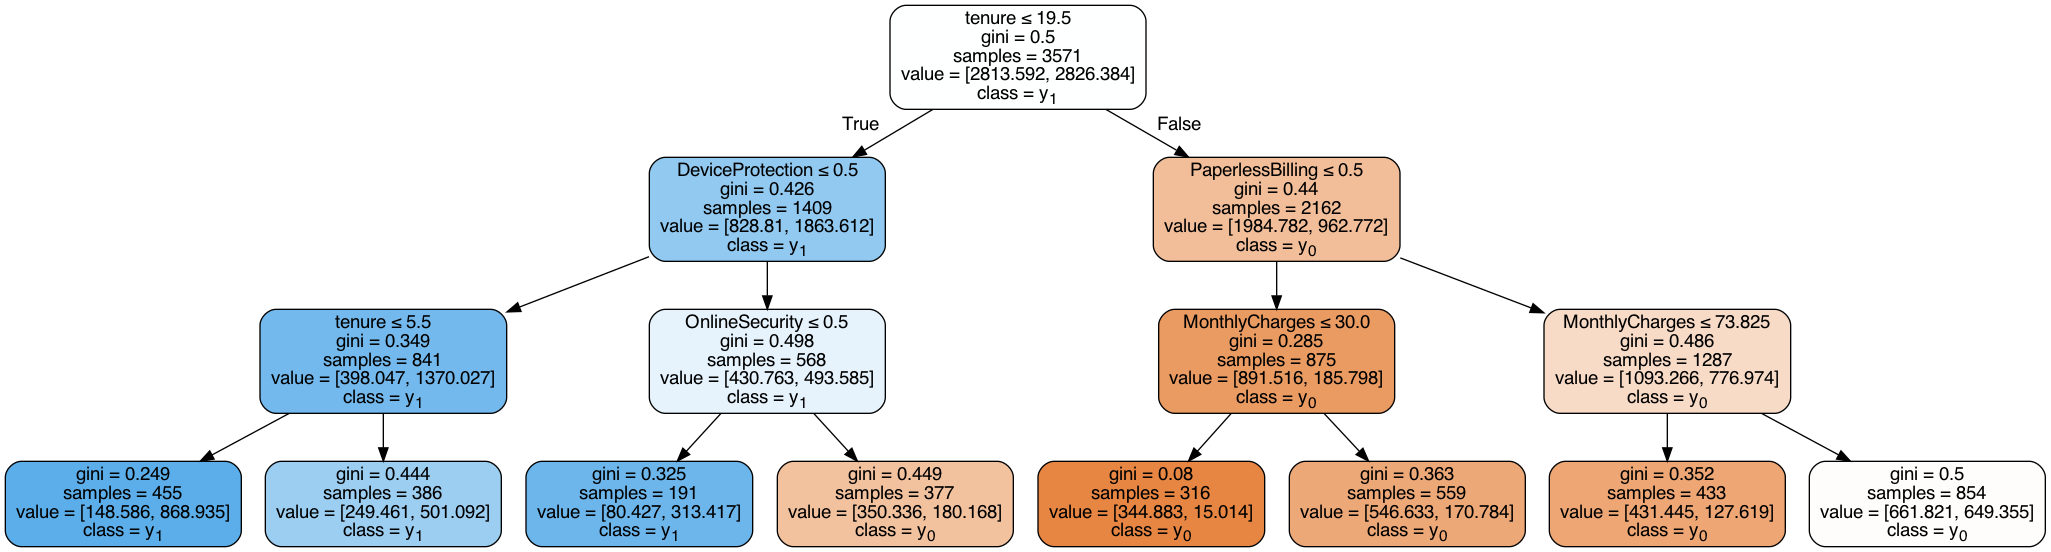

In [1750]:
from io import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(classifier.estimators_[99], out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], class_names =True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Random Forest')
Image(graph.create_png())

In [1672]:
# Valutazione preventiìva del modello di predizione
# Dal Classification report si evince chge la sensibilty del modello è pari a 0.80 rientra nella parametri accettabili
# anche la Specificità a 0.68 è nei valori attendibili


# Contract 0 = contratto mese per mese, 1 = un anno, 2 = 2 anni
# Online security 0 = no, 1 = no internt service, 2 = yes
# Tenure df3['tenure'].mean() = 32.37114865824223
# PaperlessBilling 0 = fatturazione digitale, 1 = fatturazione cartacea
# DeviceProtection 0 = No, 1 = no internet service, 2 = yes

# Conclusioni per tenerci i clienti 
# I clienti che abbandonano sono quelli nella fase inziale (sotto i 20 mesi)
# 1. Dobbiamo intervenire nella fase inziale, subito dopo l'acquisizione del cliente
#    (che è la fase temporale in cui si perdono la maggior parte di clienti)
# 2. Se un cliente ha superato i 20 mesi la fatturazione digitale fidelizza maggiormente e un MonthlyCharges <=30
#    assicura una percentuakle ottima di permanenza 
# 3. I contratti che non prevedono internet (pure attivati da poco tempo)sono un punto su cui spingere per rimanere
#    Altriementi per chi necessità di internet bisogno assicurare la DeviProtection e l'OnlineSecurity
# 4. 

In [1673]:
cm = confusion_matrix(y_test, y_pred)

In [1674]:
cm

array([[712, 329],
       [ 72, 296]])

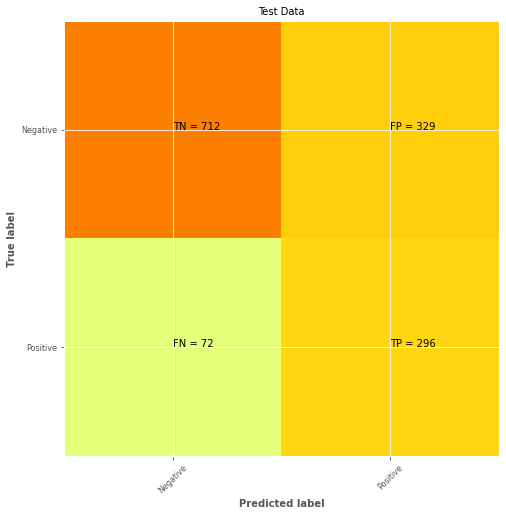

In [1675]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1676]:
print(accuracy_score(y_test,y_pred))

0.7154009936124911


In [1806]:
ang = classifier.predict(x_test) # Questa è la seconda domanda

In [1807]:
colonna = ["col_1"]

DataF = pd.DataFrame(ang, columns=colonna)

In [1826]:
colonna = ["col_1"]
DataF = pd.DataFrame(ang, index = df3['customerID'])
DataF[DataF["col_1"]==1]

ValueError: Shape of passed values is (1409, 1), indices imply (7043, 1)

In [1819]:
DataF[DataF["col_1"]==1]='Yes'

In [1820]:
DataF

,col_1
0,0
1,0
2,Yes
3,0
4,Yes
...,...
1404,Yes
1405,Yes
1406,0
1407,Yes


In [ ]:
ang = np.array([0,0,0,1,1   ])

bbb = aaa.reshape(5,1)

"""
y=0
for x in bbb:
      print(y,x)
      y = y +1
"""    

indice = ["primo", "secondo", "terzo", "quarto", "quinto"]
colonna = ["col_1"]

DataF = pd.DataFrame(bbb, index=indice, columns=colonna)
DataF

In [1677]:
296/(296+72) # Sensibilità 

0.8043478260869565

In [1678]:
709/(709+332) # Specificità

0.681075888568684

In [1679]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1041
           1       0.47      0.80      0.60       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



# FATTORI DI RETENTION

# Fatturiamo meno di € 30 al mese, fatturazione digitale, che ha una tenure > 

# di 10,5

# QUI ABBIAMO FATTO IL DECISION TREE

In [1680]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

In [1681]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])

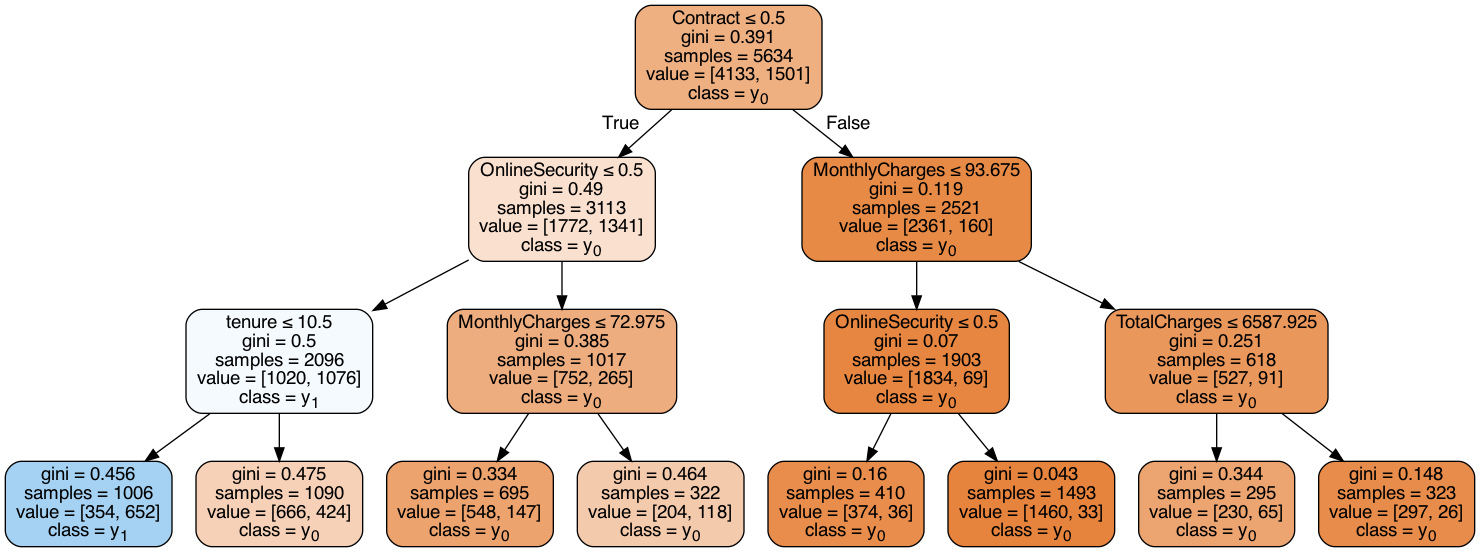

In [1682]:
from io import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], class_names =True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Random Forest')
Image(graph.create_png())


In [1683]:
# ipotesi Contract 0 = contratto mese per mese, 1 = un anno, 2 = 2anni
# Ipotesi Online security 0 = no, 1 = no internt service, 2 = yes
# Ipotesi tenure df3['tenure'].mean() = 32.37114865824223
# True Rimangono e False vanno via
# Contratto 
# Celeste sicuro come la morte rimangono 
# La gente abbandona dopo un anno di contratto 


In [1684]:
print(confusion_matrix(y_test, y_pred))

[[712 329]
 [ 72 296]]


# 928 + 175 sono previsioni corrette quindi avremo 928 TN( non abbandonano)  
# e 175 TP ( cioè abbandonano ) mentre 193 + 113 sono previsioni errate del 

# modello

# Un altro aspetto da considerare è la precision 

# la precision ci dice che su 


In [1685]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1041
           1       0.47      0.80      0.60       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



In [1686]:
cm = confusion_matrix(y_test, y_pred)

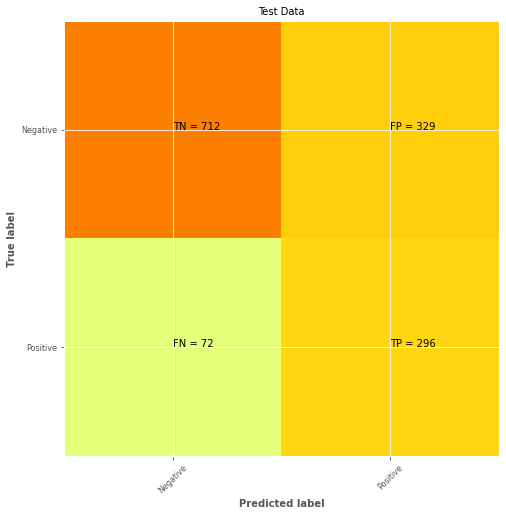

In [1687]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1688]:
print(accuracy_score(y_test,y_pred))

0.7154009936124911


In [1689]:
293/(1007+293) # Per ogni 6 clienti il nostro modello ne considera che ha non abbandonato ma che l'ha fatto


0.22538461538461538

In [1690]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 3)
clf.fit(x_train,y_train)

y_predict = clf.predict(x_test)

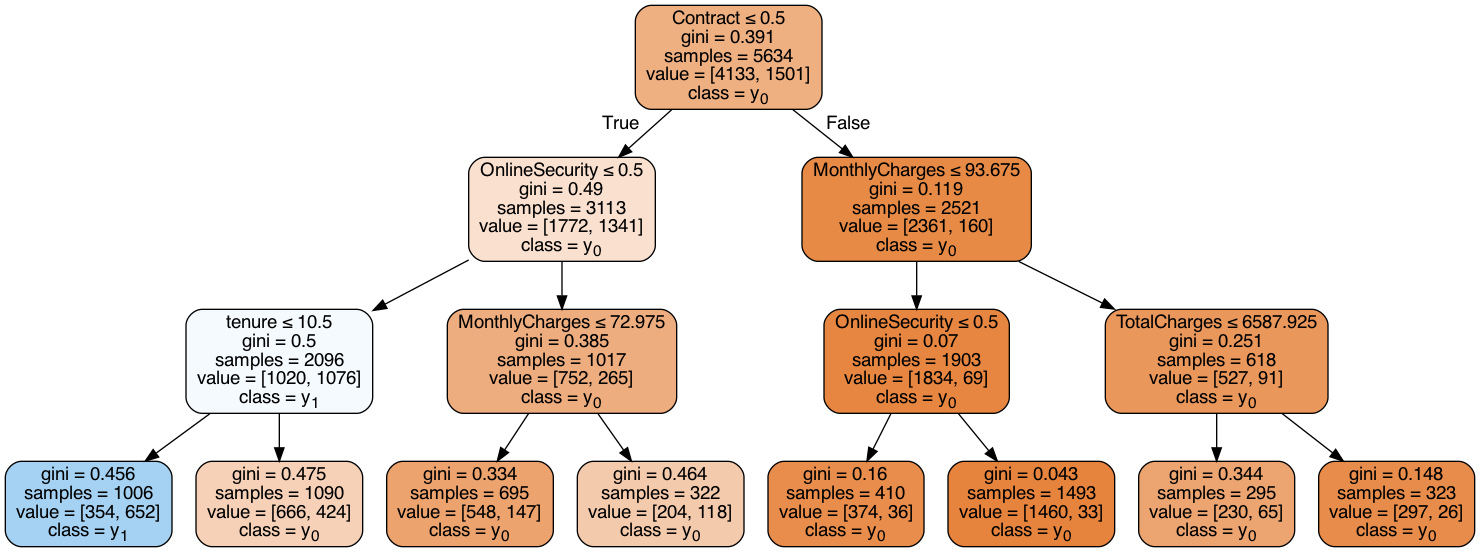

In [1691]:
from io import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], class_names = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Random Forest')
Image(graph.create_png())

In [1692]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Inserire un max_depth più profondo 

In [1693]:
clf.classes_

array([0, 1])

In [1694]:
print(confusion_matrix(y_test, y_pred))

[[712 329]
 [ 72 296]]


In [1695]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1041
           1       0.47      0.80      0.60       368

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



In [1696]:
cm = confusion_matrix(y_test, y_pred)

In [1697]:
print(accuracy_score(y_test,y_pred))

0.7154009936124911


In [1698]:
df3['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [1699]:
(1869/7043)*100

26.536987079369588

In [1700]:
column = ['tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
importances = classifier.feature_importances_
feature_imp = pd.Series(classifier.feature_importances_,index= column).sort_values(ascending=False)
print(feature_imp*100)

Contract            37.883459
tenure              13.744977
TechSupport         11.166018
OnlineSecurity       9.370813
InternetService      5.767653
TotalCharges         4.618396
OnlineBackup         4.440988
DeviceProtection     4.376382
MonthlyCharges       4.216232
PaymentMethod        1.950179
PaperlessBilling     0.750670
StreamingTV          0.475267
StreamingMovies      0.325622
Dependents           0.318283
SeniorCitizen        0.260106
MultipleLines        0.177345
Partner              0.114037
PhoneService         0.035232
gender               0.008340
dtype: float64


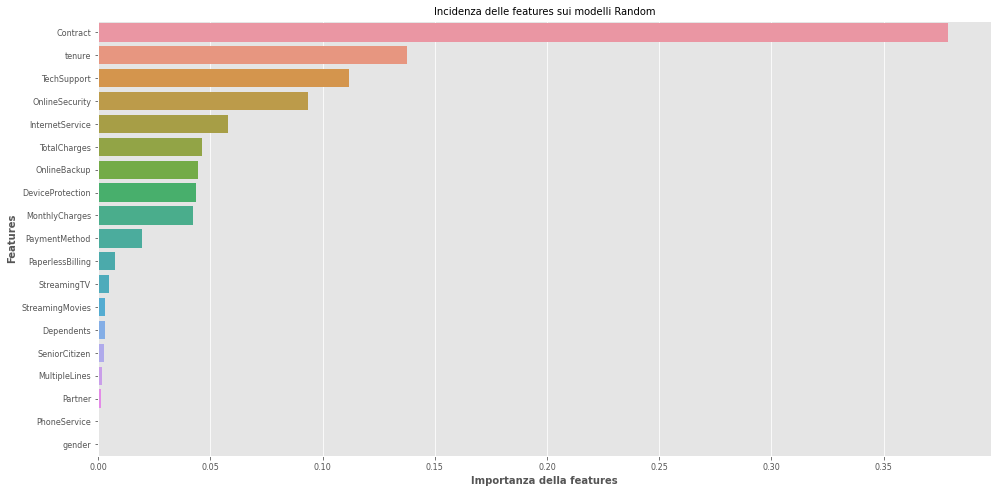

In [1701]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importanza della features')
plt.ylabel('Features')
plt.title('Incidenza delle features sui modelli Random')
plt.show()

# SVILUPPO ANALISI DI MACHINE LEARNING 

# Provvediamo a fare una PCA dell'80% delle features che hanno un valore 

# significativo 

# MonthlyCharges  23.228063

# tenure  23.112774

# Contract  9.726823

# PaymentMethod  6.206174

# TechSupport  4.194538

# OnlineSecurity 4.024183

# gender 3.202556

# OnlineBackup 3.090788

# DeviceProtection 2.973211

# Incidono per l'82,63% 

# Sviluppiamo quindi una Random Forest di tipo Machine Learning


In [1702]:
df3_ml= df3[['Churn', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'gender', 'OnlineBackup', 'DeviceProtection']]

In [1703]:
x_ml= df3_ml.drop(['Churn'], axis=1) # Selezione di tutte le Fetaures tranne Churn che dsarà la nostra Y

In [1704]:
x_ml

,MonthlyCharges,tenure,Contract,PaymentMethod,TechSupport,OnlineSecurity,gender,OnlineBackup,DeviceProtection
0,29.85,1,0,2,0,0,0,2,0
1,56.95,34,1,3,0,2,1,0,2
2,53.85,2,0,3,0,2,1,2,0
3,42.30,45,1,0,2,2,1,0,2
4,70.70,2,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7038,84.80,24,1,3,2,2,1,0,2
7039,103.20,72,1,1,0,0,0,2,2
7040,29.60,11,0,2,0,2,0,0,0
7041,74.40,4,0,3,0,0,1,0,0


In [1705]:
y_ml = df3['Churn']

In [1706]:
x_ml_train, x_ml_test, y_ml_train, y_ml_test = train_test_split(x_ml, y_ml, test_size= 0.2, random_state =0)

In [1707]:
classifier = RandomForestClassifier(n_estimators =100, random_state =0,class_weight='balanced')
classifier.fit(x_ml_train, y_ml_train)
y_ml_pred = classifier.predict(x_ml_test)

In [1708]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 3)
clf.fit(x_ml_train,y_ml_train)

y_ml_predict = clf.predict(x_ml_test)

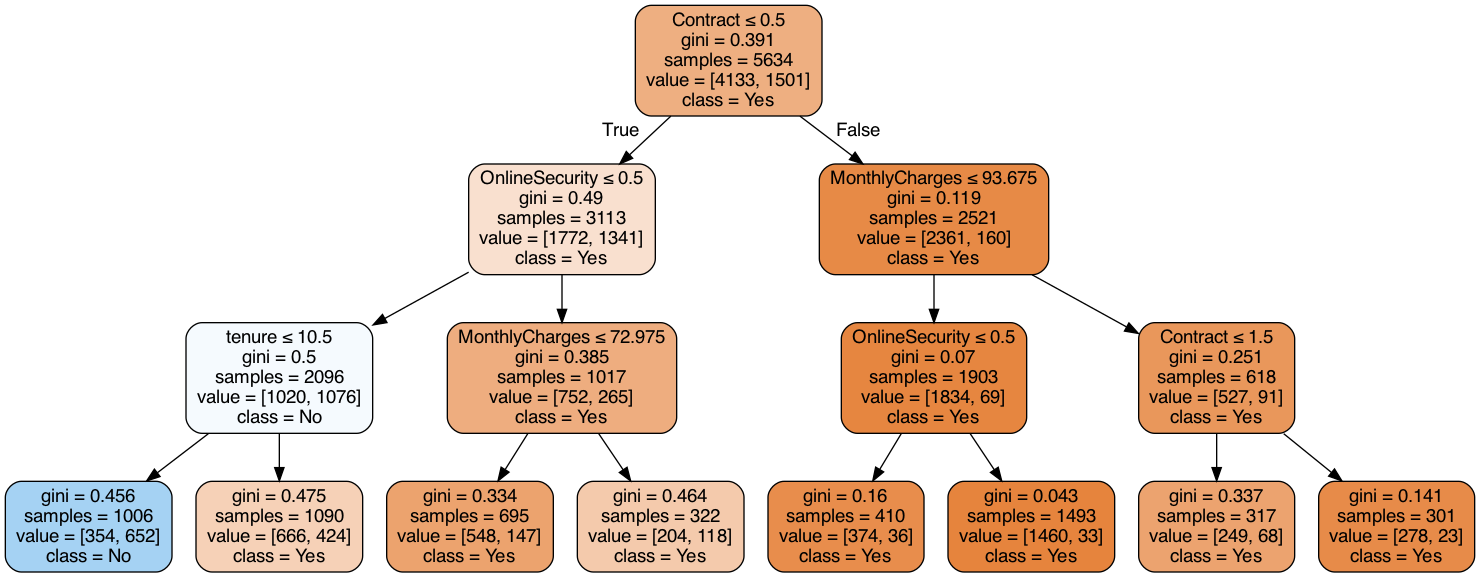

In [1709]:
from io import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names = ['MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'gender', 'OnlineBackup', 'DeviceProtection'], class_names =['Yes', 'No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Random Forest')
Image(graph.create_png())

In [1710]:
print(confusion_matrix(y_ml_test, y_ml_pred))

[[909 132]
 [199 169]]


In [1711]:
print(classification_report(y_ml_test, y_ml_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1041
           1       0.56      0.46      0.51       368

    accuracy                           0.77      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.77      0.76      1409



In [1712]:
cm = confusion_matrix(y_ml_test, y_ml_pred)

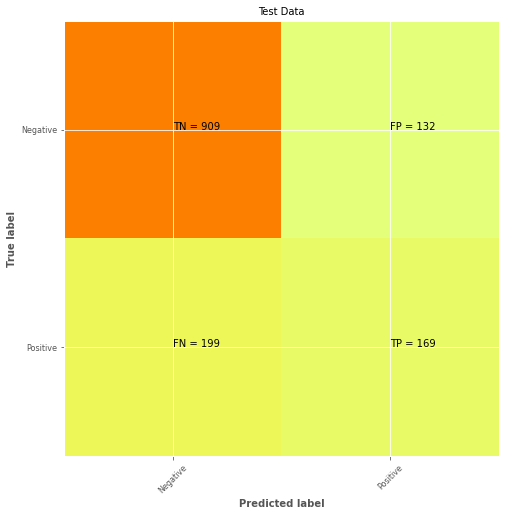

In [1713]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1714]:
print(accuracy_score(y_ml_test,y_ml_pred))

0.7650816181689141


In [1715]:
column = ['MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod', 'TechSupport', 'OnlineSecurity', 'gender', 'OnlineBackup', 'DeviceProtection']
importances = classifier.feature_importances_
feature_imp = pd.Series(classifier.feature_importances_,index= column).sort_values(ascending=False)
print(feature_imp*100)

MonthlyCharges      33.489991
tenure              26.619700
Contract            14.000532
TechSupport          6.078568
PaymentMethod        6.049087
OnlineSecurity       5.738376
OnlineBackup         2.969768
gender               2.831077
DeviceProtection     2.222901
dtype: float64


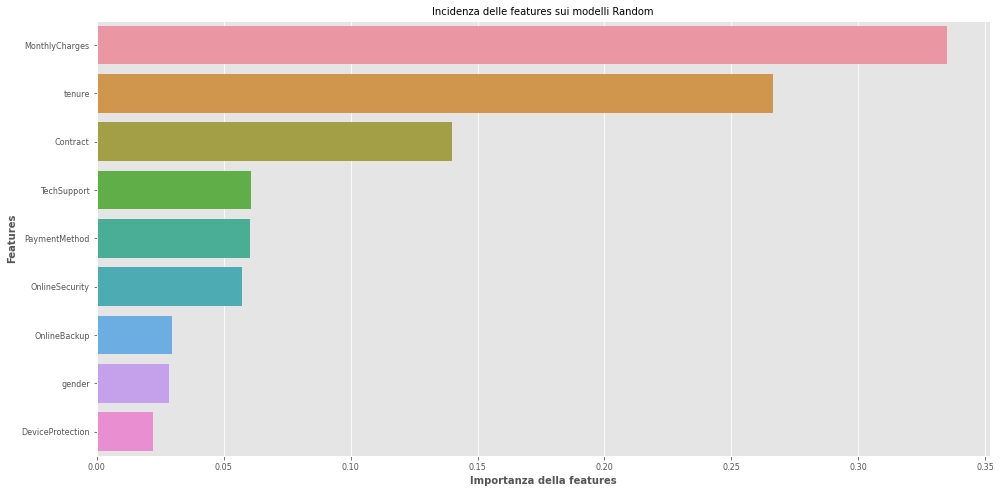

In [1716]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importanza della features')
plt.ylabel('Features')
plt.title('Incidenza delle features sui modelli Random')
plt.show()

# ANALISI CON PREDITOTRI SELEZIONATI IN BASE A CONSIDERAIZONI 

# PERSONALI 

# Questa analisi si fonda sull'individuazione del target di pubblico quindi 

# vengono selezionate features che afferiscono alla persona

In [1717]:
df4 = df3[['Churn', 'gender', 'SeniorCitizen','Partner','Dependents']]

In [1718]:
df4

,Churn,gender,SeniorCitizen,Partner,Dependents
0,0,0,0,1,0
1,0,1,0,0,0
2,1,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
7038,0,1,0,1,1
7039,0,0,0,1,1
7040,0,0,0,1,1
7041,1,1,1,1,0


In [1719]:
X = df4.drop(['Churn'], axis=1) # Selezione di tutte le Fetaures tranne Churn che dsarà la nostra Y

In [1720]:
Y = df4['Churn']

In [1721]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state =0)

In [1722]:
classifier = RandomForestClassifier(n_estimators =100, random_state =0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [1723]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 3)
clf.fit(X_train,Y_train)

Y_predict = clf.predict(X_test)

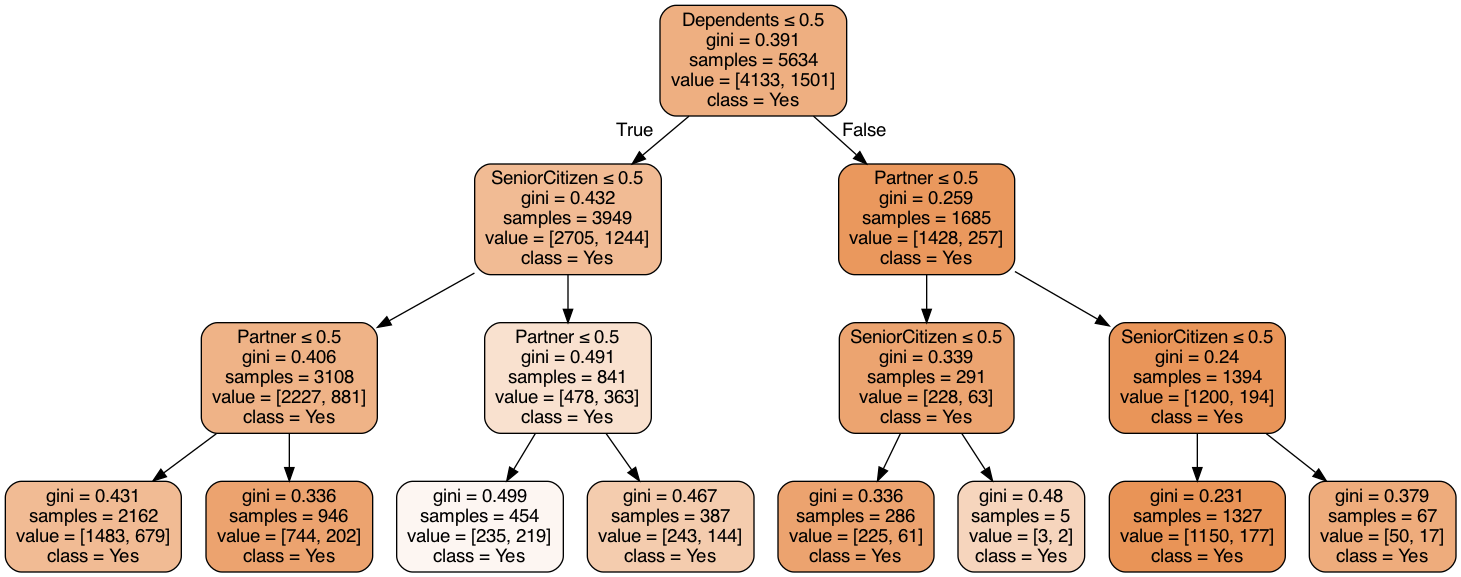

In [1724]:
from io import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], class_names =['Yes', 'No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Random Forest II')
Image(graph.create_png())


In [1725]:
print(confusion_matrix(Y_test, Y_pred))

[[1039    2]
 [ 368    0]]


In [1726]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1041
           1       0.00      0.00      0.00       368

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.55      0.74      0.63      1409



In [1727]:
cm = confusion_matrix(Y_test, Y_pred)

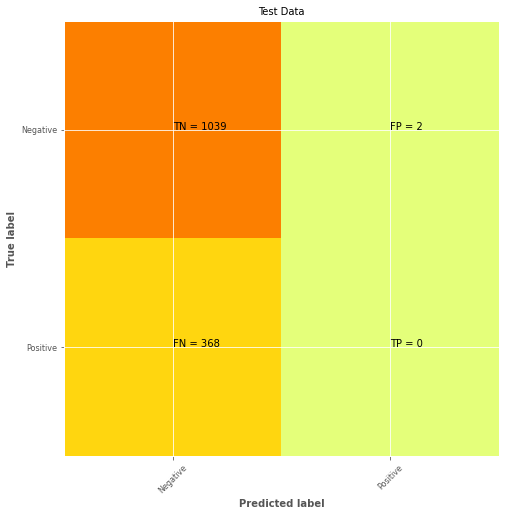

In [1728]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1729]:
print(accuracy_score(Y_test,Y_pred))

0.7374024130589071


In [1730]:
column = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
importances = classifier.feature_importances_
feature_imp = pd.Series(classifier.feature_importances_,index= column).sort_values(ascending=False)
print(feature_imp*100)

Dependents       35.740936
SeniorCitizen    33.991097
Partner          27.556443
gender            2.711524
dtype: float64


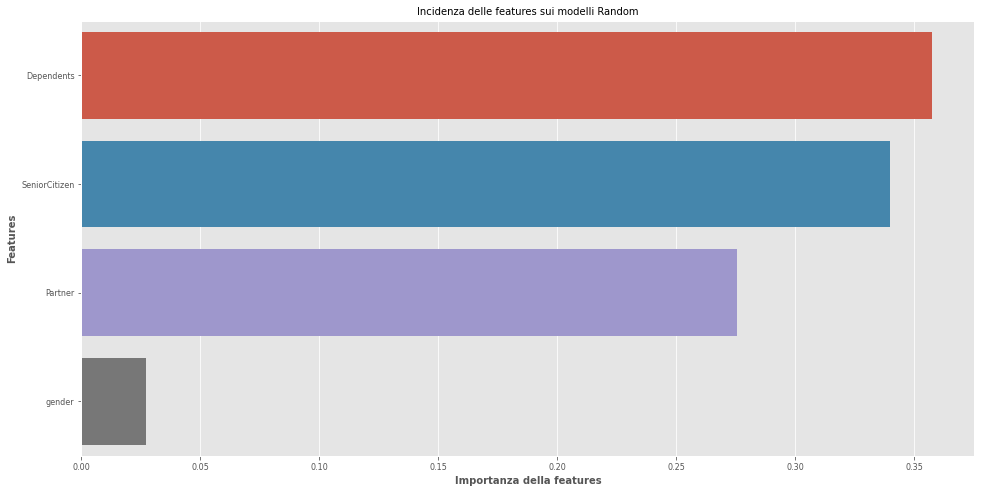

In [1731]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importanza della features')
plt.ylabel('Features')
plt.title('Incidenza delle features sui modelli Random')
plt.show()

In [1732]:
# Questa analisi afferisce ad una selezion e di features che son oprevalentemente i servizi offerti dalla compagnia 

In [1733]:
df5 = df3[[ 'Churn', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']]

In [1734]:
df5

,Churn,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,1,0,0,2,2,0,0,0,0,0,1,3
3,0,0,1,0,2,0,2,2,0,0,1,0,0
4,1,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,2,1,0,0,0,0,0,0,0,1,3


In [1735]:
X1 = df5.drop(['Churn'], axis=1)

In [1736]:
Y1 = df5['Churn']

In [1737]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size= 0.2, random_state =0)

In [1738]:
classifier = RandomForestClassifier(n_estimators =100, random_state =0)
classifier.fit(X1_train, Y1_train)
Y1_pred = classifier.predict(X1_test)

In [1739]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 3)
clf.fit(X1_train,Y1_train)

Y1_predict = clf.predict(X1_test)

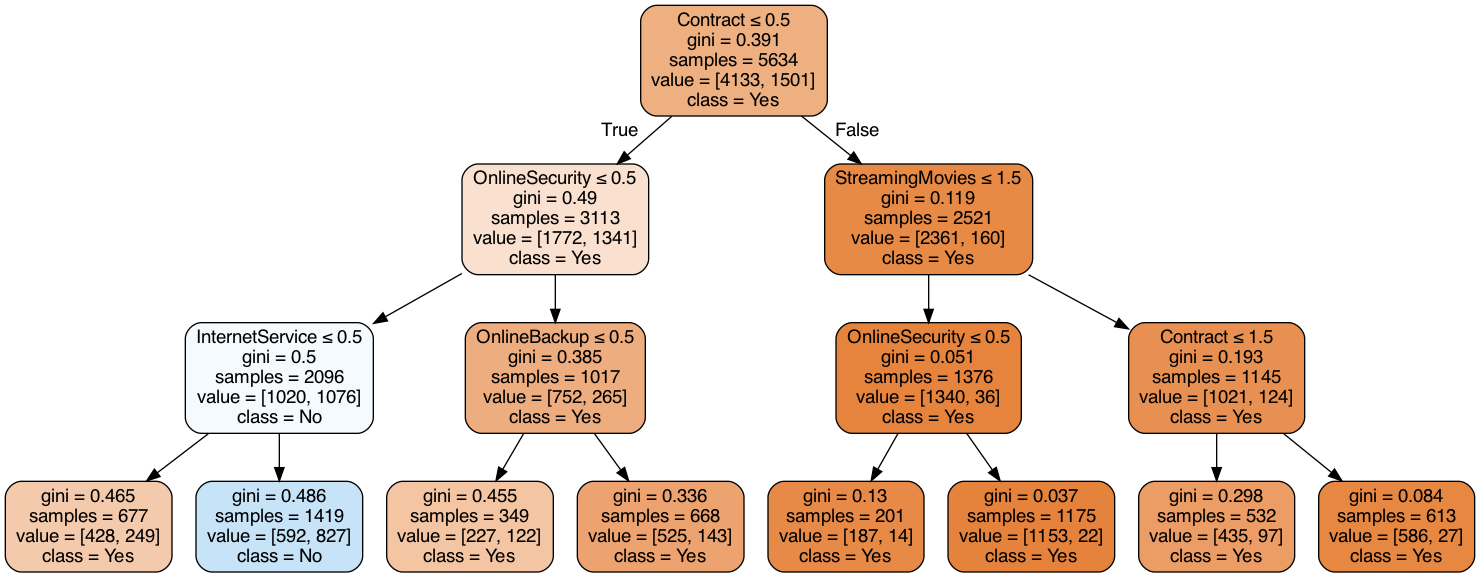

In [1740]:
from io import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled = True, rounded = True, special_characters= True, feature_names = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], class_names =['Yes', 'No'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Random Forest II')
Image(graph.create_png())

In [1741]:
print(confusion_matrix(Y1_test, Y1_pred))

[[903 138]
 [194 174]]


In [1742]:
print(classification_report(Y1_test, Y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1041
           1       0.56      0.47      0.51       368

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409



In [1743]:
cm = confusion_matrix(Y1_test, Y1_pred)

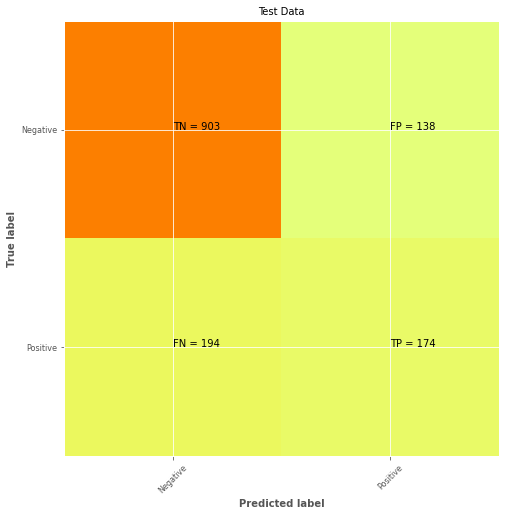

In [1744]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [1745]:
print(accuracy_score(Y1_test,Y1_pred))

0.7643718949609652


In [1746]:
column = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
importances = classifier.feature_importances_
feature_imp = pd.Series(classifier.feature_importances_,index= column).sort_values(ascending=False)
print(feature_imp*100)

Contract            20.953586
PaymentMethod       15.385705
TechSupport          9.351816
OnlineSecurity       9.170875
OnlineBackup         7.048693
InternetService      7.023965
DeviceProtection     6.434879
MultipleLines        6.378018
PaperlessBilling     5.844609
StreamingTV          5.498903
StreamingMovies      5.493707
PhoneService         1.415242
dtype: float64


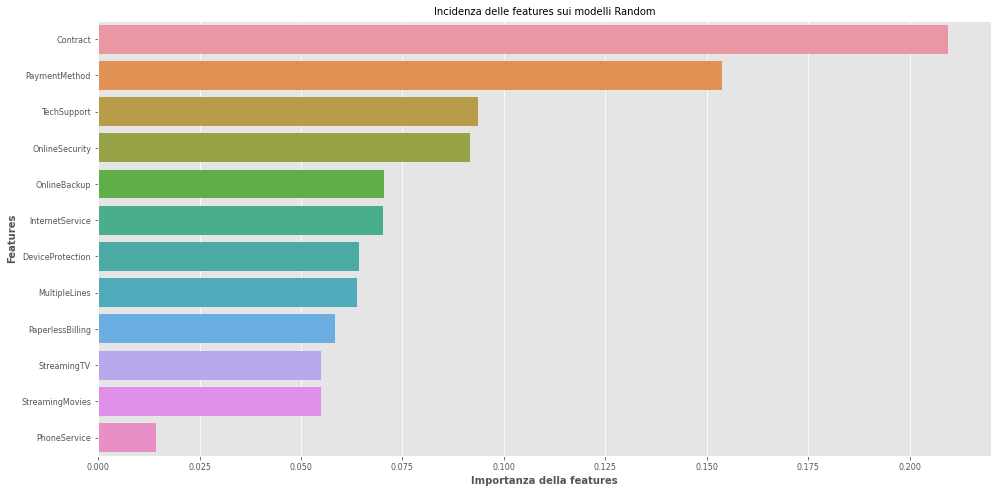

In [1747]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importanza della features')
plt.ylabel('Features')
plt.title('Incidenza delle features sui modelli Random')
plt.show()